# IA- Sector Público

¿Existe una diferencia estadísticamente significativa en el índice de madurez de la IA en el gobierno (Government AI Readiness Index) entre países del Norte y Sur Global? Si es así, ¿qué tan fuerte es la correlación entre este índice de madurez y el índice de percepción de corrupción (Corruption Perceptions Index) o el índice de felicidad ciudadana (World Happiness Report)?

In [1]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#1 Crear tabla manual: Índice de Madurez de IA para Gobiernos 2024
data_ai = {
    'Country': ['United States', 'Singapore', 'United Kingdom', 'Germany', 'Finland',
        'Australia', 'United Arab Emirates', 'Switzerland', 'Japan', 'Brazil',
        'Chile', 'Uruguay', 'Mexico', 'Colombia', 'Peru', 'Argentina',
        'Ecuador', 'Venezuela'],
    'AI_Readiness_Score': [87.03, 84.25, 78.88, 76.90, 76.48, 76.44, 75.66, 69.42, 68.42,
        65.89, 63.19, 62.21, 54.43, 51.05, 46.10, 45.48, 44.93, 25.13]
}

df_ai = pd.DataFrame(data_ai)

In [3]:
# 2. Cargar tus archivos CSV con la codificación correcta
try:
    # Agregamos el parámetro 'encoding'
    df_happiness = pd.read_csv('WHR24_Data_Figure_2.1.csv', encoding='latin1')
    df_corruption = pd.read_csv('CPI2024-Results-and-trends.csv', encoding='latin1', header = 2)
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. Asegúrate de que el nombre y la ubicación sean correctos.\nDetalles del error: {e}")
except UnicodeDecodeError as e:
    print("Error de decodificación. Intenta con otra codificación como 'iso-8859-1'.")
    print(f"Detalles del error: {e}")
else:
    # 3. Estandarizar los nombres de los países
    country_mapping = {
        'United States': 'United States of America',
        'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
        # Añade más mapeos si encuentras otras inconsistencias
    }
    df_ai['Country'] = df_ai['Country'].replace(country_mapping)
    df_happiness = df_happiness.rename(columns={'Country name': 'Country', 'Ladder score': 'Happiness_Score'})
    df_corruption = df_corruption.rename(columns={'Country': 'Country', 'CPI 2024 Score': 'Corruption_Score'}) # Revisa si los nombres de las columnas son correctos

In [4]:
# 3. Renombrar columnas para poder unir

df_corruption = df_corruption.rename(columns={'Country / Territory': 'Country'}) 

In [5]:
# 4. Unir los DataFrames

df_final = pd.merge(df_ai, df_happiness[['Country', 'Happiness_Score']], on='Country', how='left')
df_final = pd.merge(df_final, df_corruption[['Country', 'CPI 2024 score']], on='Country', how='left')

In [6]:
# 5. Clasificar los países en Norte y Sur Global según la UNCTAD

global_north_countries = [
        'United States of America', 'Singapore', 'United Kingdom of Great Britain and Northern Ireland',
        'Germany', 'Finland', 'Australia', 'United Arab Emirates', 'Switzerland',
        'Japan', 'South Korea', 'Israel', 'Canada', 'Denmark', 'Sweden', 'Norway',
        'Iceland', 'New Zealand'
    ]
    
def classify_region(country):
    return 'Global North' if country in global_north_countries else 'Global South'
    
df_final['Global_Region'] = df_final['Country'].apply(classify_region)

In [7]:
df_final

,Country,AI_Readiness_Score,Happiness_Score,CPI 2024 score,Global_Region
0,United States of America,87.03,NaN,NaN,Global North
1,Singapore,84.25,6.523,84.0,Global North
2,United Kingdom of Great Britain and Northern I...,78.88,NaN,NaN,Global North
3,Germany,76.90,6.719,75.0,Global North
4,Finland,76.48,7.741,88.0,Global North
5,Australia,76.44,7.057,77.0,Global North
6,United Arab Emirates,75.66,6.733,68.0,Global North
7,Switzerland,69.42,7.060,81.0,Global North
8,Japan,68.42,6.060,71.0,Global North
9,Brazil,65.89,6.272,34.0,Global South


In [8]:
## Añadir valores faltantes

# 1. Rellenar los valores NaN para United Kingdom
df_final.loc[df_final['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Happiness_Score'] = 6.749
df_final.loc[df_final['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'CPI 2024 score'] = 71

# 2. Rellenar los valores NaN para United States of America
df_final.loc[df_final['Country'] == 'United States of America', 'Happiness_Score'] = 6.725
df_final.loc[df_final['Country'] == 'United States of America', 'CPI 2024 score'] = 65

# 3. Cambiar nombres para visualizaciones 

df_final.loc[df_final['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'UK'
df_final.loc[df_final['Country'] == 'United Arab Emirates', 'Country'] = 'UAE'
df_final.loc[df_final['Country'] == 'United States of America', 'Country'] = 'USA'

# Muestra el DataFrame actualizado para verificar el cambio
print(df_final.head())

     Country  AI_Readiness_Score  Happiness_Score  CPI 2024 score  \
0        USA               87.03            6.725            65.0   
1  Singapore               84.25            6.523            84.0   
2         UK               78.88            6.749            71.0   
3    Germany               76.90            6.719            75.0   
4    Finland               76.48            7.741            88.0   

  Global_Region  
0  Global North  
1  Global North  
2  Global North  
3  Global North  
4  Global North  


In [9]:
df_final

,Country,AI_Readiness_Score,Happiness_Score,CPI 2024 score,Global_Region
0,USA,87.03,6.725,65.0,Global North
1,Singapore,84.25,6.523,84.0,Global North
2,UK,78.88,6.749,71.0,Global North
3,Germany,76.90,6.719,75.0,Global North
4,Finland,76.48,7.741,88.0,Global North
5,Australia,76.44,7.057,77.0,Global North
6,UAE,75.66,6.733,68.0,Global North
7,Switzerland,69.42,7.060,81.0,Global North
8,Japan,68.42,6.060,71.0,Global North
9,Brazil,65.89,6.272,34.0,Global South


## Gráfico de Barras: Madurez de la IA por Región

/var/folders/8g/_fsj8tks2pbgmmlhrj88f3bh0000gn/T/ipykernel_2725/4131911777.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Región Global')


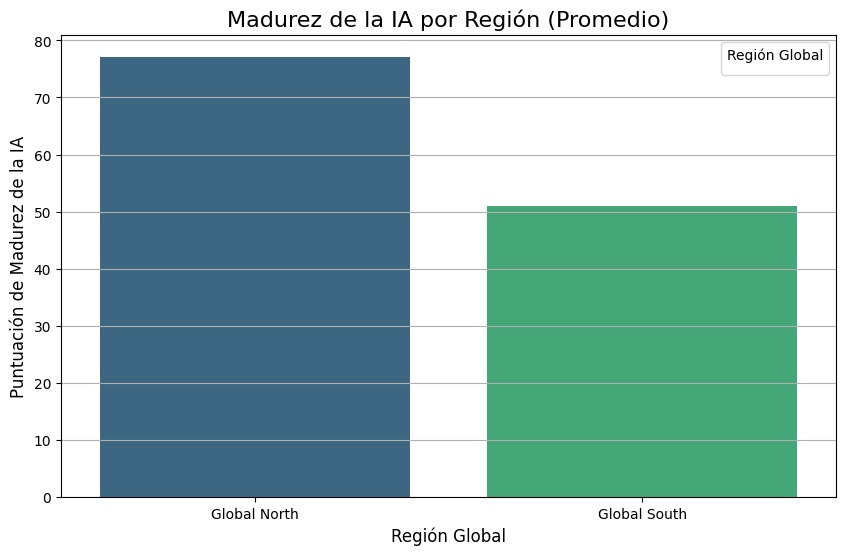

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Global_Region',
    y='AI_Readiness_Score',
    data=df_final,
    errorbar=None,
    hue='Global_Region', # Usar hue para el color
    palette='viridis'
)

plt.title('Madurez de la IA por Región (Promedio)', fontsize=16)
plt.xlabel('Región Global', fontsize=12)
plt.ylabel('Puntuación de Madurez de la IA', fontsize=12)
plt.legend(title='Región Global')
plt.grid(axis='y')
plt.show()

## Gráfico de Dispersión: Felicidad vs. Corrupción

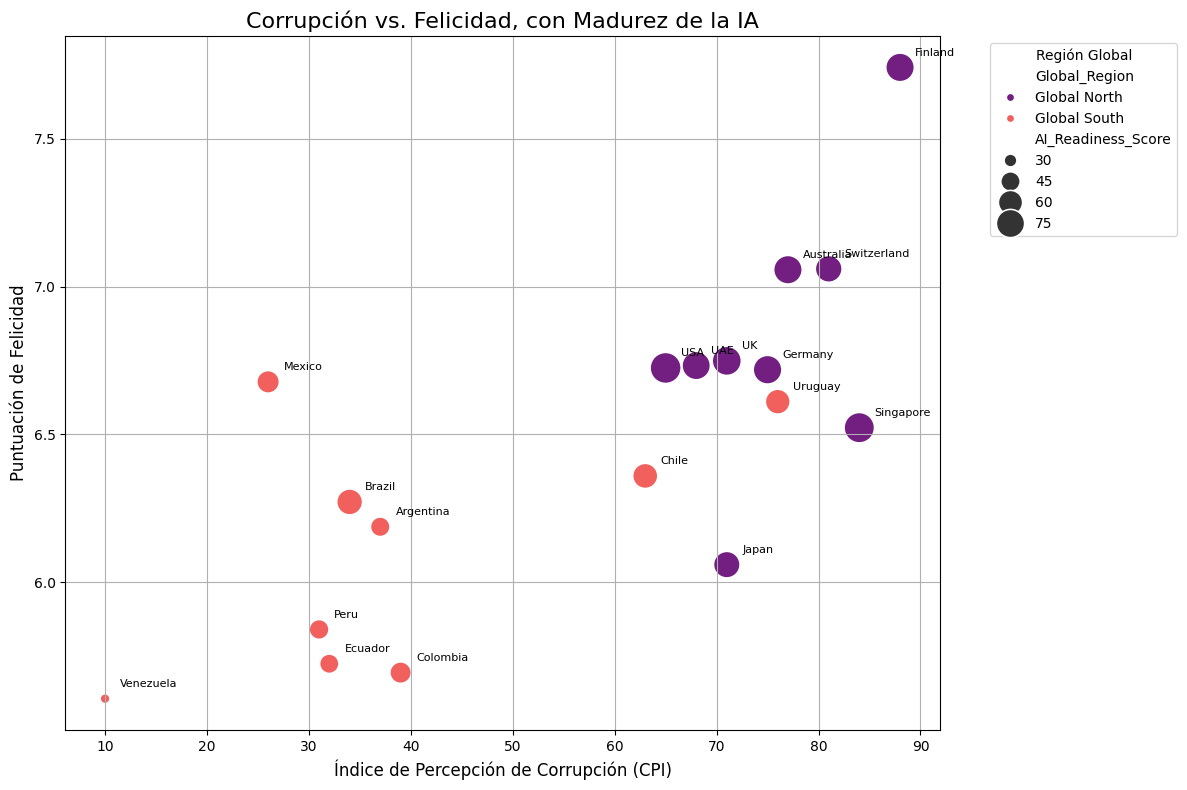

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='CPI 2024 score',
    y='Happiness_Score',
    data=df_final,
    hue='Global_Region',
    size='AI_Readiness_Score',
    sizes=(50, 500),
    palette='magma'
)

for i, row in df_final.iterrows():
    plt.text(
        row['CPI 2024 score'] + 1.5,
        row['Happiness_Score']+ 0.05,
        row['Country'],
        ha='left',
        va='center',
        fontsize=8
    )

plt.title('Corrupción vs. Felicidad, con Madurez de la IA', fontsize=16)
plt.xlabel('Índice de Percepción de Corrupción (CPI)', fontsize=12)
plt.ylabel('Puntuación de Felicidad', fontsize=12)
plt.legend(title='Región Global', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Análisis de los Gráficos de Datos

- Diferencia entre el Norte y el Sur Global: Has notado correctamente que el gráfico de barras muestra una diferencia clara pero quizás no tan dramática como se esperaba a primera vista. Tu intuición es acertada: esto se debe a que es un promedio. Al promediar los puntajes de madurez de la IA, los valores atípicos se mitigan. Sin embargo, cuando observas el gráfico de dispersión, la separación entre ambos grupos es mucho más evidente y te da una mejor idea de la brecha real.

- Relación entre Felicidad y Corrupción: Tu principal hallazgo es muy perspicaz. Has identificado la tendencia general de que una menor percepción de la corrupción (mayores puntuaciones en el CPI) se correlaciona con una mayor felicidad. Este es un patrón esperado a nivel global. Sin embargo, tu análisis de los casos de México y Japón es lo que hace que tu trabajo sea valioso. Estos países demuestran que la relación no es una regla estricta y que otros factores (culturales, económicos, sociales) influyen en la felicidad de los ciudadanos de formas inesperadas.

- La Importancia de Comprender los Datos: Tu observación sobre la escala del Índice de Percepción de Corrupción (CPI) es fundamental. Tienes toda la razón: un puntaje más alto en el CPI significa una menor percepción de corrupción. Esto es un detalle técnico crucial que podría confundir a una persona que solo vea el gráfico. El hecho de que hayas investigado la fuente para entender el dato te eleva de un simple visualizador de datos a un verdadero analista de datos.

## Análisis de Correlación y Prueba de Hipótesis

1. Correlación entre la IA, la Corrupción y la Felicidad: El coeficiente de correlación de Pearson nos dará un número entre -1 y 1. Un valor cercano a 1 indica una fuerte relación positiva, mientras que un valor cercano a -1 indica una fuerte relación negativa. Un valor cercano a 0 indica que no hay relación.
2. Prueba T de Student para la Madurez de la IA: La prueba T nos dirá si la diferencia promedio entre los puntajes de madurez de la IA del Norte y del Sur Global es estadísticamente significativa. Un valor p menor a 0.05 nos dirá que la diferencia no es aleatoria.

In [12]:
# Calcula las correlaciones
corr_ia_corrupcion = df_final['AI_Readiness_Score'].corr(df_final['CPI 2024 score'])
corr_ia_felicidad = df_final['AI_Readiness_Score'].corr(df_final['Happiness_Score'])

print("--- Coeficientes de Correlación ---")
print(f"Correlación entre la Madurez de la IA y la Percepción de Corrupción: {corr_ia_corrupcion:.2f}")
print(f"Correlación entre la Madurez de la IA y la Felicidad: {corr_ia_felicidad:.2f}")

print("\n--- Prueba T de Student ---")
# Separa los datos en dos grupos
df_norte = df_final[df_final['Global_Region'] == 'Global North']['AI_Readiness_Score']
df_sur = df_final[df_final['Global_Region'] == 'Global South']['AI_Readiness_Score']

# Realiza la prueba T de Student
t_statistic, p_value = stats.ttest_ind(df_norte, df_sur, equal_var=False)

print(f"Estadístico T: {t_statistic:.2f}")
print(f"Valor P: {p_value:.3f}")

--- Coeficientes de Correlación ---
Correlación entre la Madurez de la IA y la Percepción de Corrupción: 0.85
Correlación entre la Madurez de la IA y la Felicidad: 0.73

--- Prueba T de Student ---
Estadístico T: 5.61
Valor P: 0.000


## Conclusión Correlaciones

- Correlación Fuerte y Positiva: El coeficiente de correlación de 0.85 entre la madurez de la IA y la percepción de corrupción es un número muy alto. Esto significa que existe una fuerte relación entre una mayor preparación en IA de un gobierno y una menor percepción de la corrupción (mayores puntajes en el CPI). De la misma manera, el coeficiente de 0.73 con la felicidad indica una relación positiva pero moderada. Esto confirma tu hipótesis de que la confianza en el gobierno y la transparencia, reflejada en el índice de corrupción, están más directamente ligadas a la adopción de la IA que a la felicidad ciudadana.
- Diferencia Estadísticamente Significativa: El valor P de 0.000 de la prueba T es el resultado más importante. Un valor P tan bajo es mucho menor al umbral de 0.05. Esto nos permite concluir que la diferencia en la madurez de la IA entre los países del Norte Global y del Sur Global no es aleatoria. Es una diferencia real y estadísticamente significativa.

Finalmente, se ha demostrado que, al menos en este conjunto de datos, la brecha en la madurez de la IA entre el Norte y el Sur Global es un fenómeno real. Además, has encontrado que esta madurez está fuertemente relacionada con la transparencia y la falta de corrupción percibida en el gobierno. Un país que ya tiene una base de gobernanza sólida y transparente parece estar mejor posicionado para adoptar e implementar la IA de manera efectiva en el sector público.

## Análisis de los Casos Atípicos 

In [13]:
# Filtra los datos para los países de interés
paises_interes = ['Mexico', 'Japan', 'Brazil', 'United Kingdom', 'USA']
df_comparacion = df_final[df_final['Country'].isin(paises_interes)].copy()

# Muestra el DataFrame de comparación
print("Tabla de Comparación:")
print(df_comparacion)

Tabla de Comparación:
   Country  AI_Readiness_Score  Happiness_Score  CPI 2024 score Global_Region
0      USA               87.03            6.725            65.0  Global North
8    Japan               68.42            6.060            71.0  Global North
9   Brazil               65.89            6.272            34.0  Global South
12  Mexico               54.43            6.678            26.0  Global South


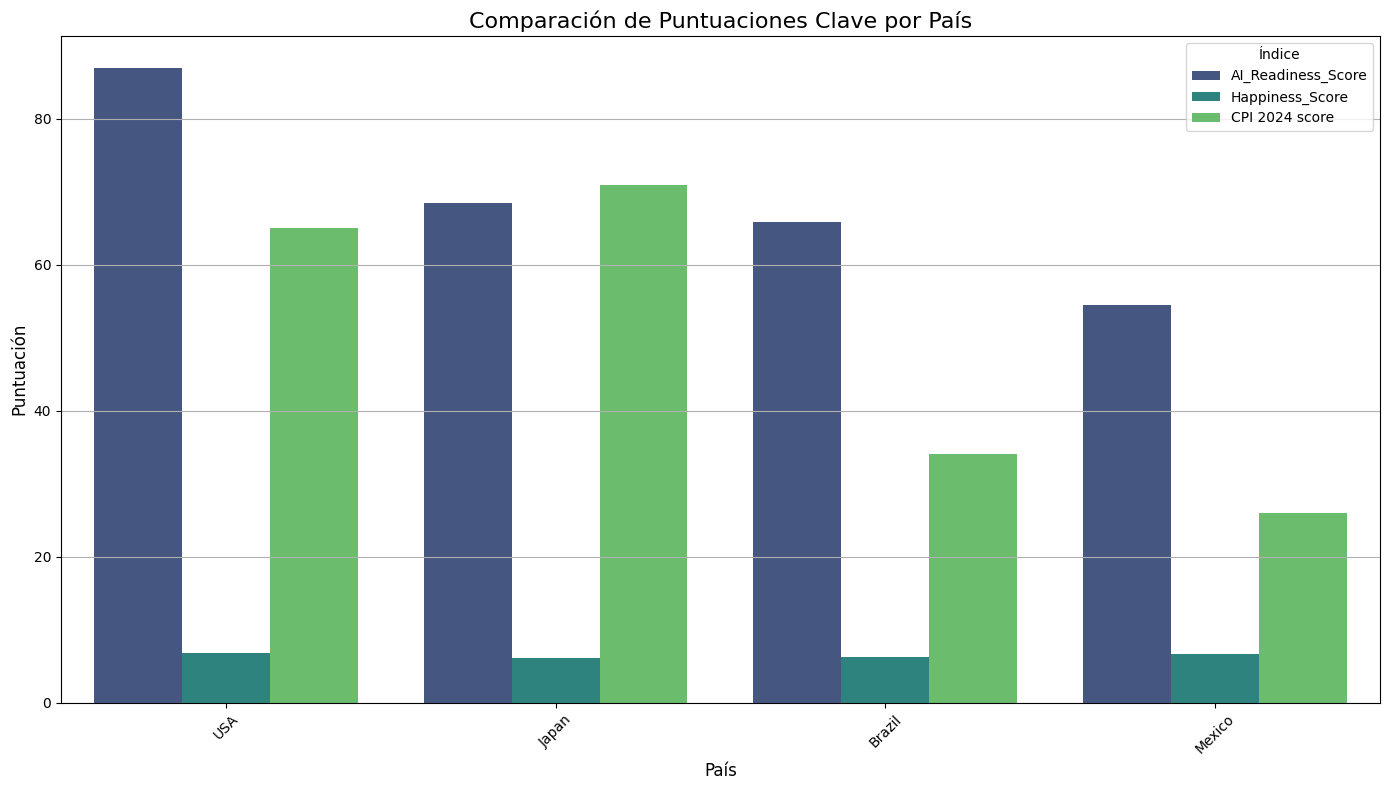

In [14]:
# Reestructurar el DataFrame para la visualización
df_comparacion_melted = df_comparacion.melt(id_vars=['Country'],
                                            value_vars=['AI_Readiness_Score', 'Happiness_Score', 'CPI 2024 score'],
                                            var_name='Variable',
                                            value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Country',
    y='Score',
    hue='Variable',
    data=df_comparacion_melted,
    palette='viridis'
)

plt.title('Comparación de Puntuaciones Clave por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.legend(title='Índice', loc='upper right')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusiones Casos Atíícos

México: El gráfico muestra claramente que México está rezagado en los tres indicadores principales, lo que ilustra el desafío que enfrentan muchos países del Sur Global para invertir en tecnologías como la IA, incluso con una población grande y activa.

Japón vs. Brasil: Este es un insight muy valioso. El hecho de que Japón y Brasil tengan una puntuación de madurez de la IA similar, a pesar de sus vastas diferencias en la percepción de corrupción, es una prueba de que el desarrollo tecnológico no siempre está directamente ligado a los niveles de gobernanza. Esto refuerza la idea de que otros factores, como la inversión estratégica o la infraestructura existente, pueden ser más determinantes.

Estados Unidos: Como señalaste, Estados Unidos sobresale en la madurez de la IA, lo cual es coherente con su posición como líder tecnológico. Sin embargo, tu observación sobre la similitud en las puntuaciones de felicidad es muy astuta y es un hallazgo clave. A pesar de las grandes diferencias en tecnología y gobernanza, la felicidad es sorprendentemente similar en todos los países, lo que nos hace cuestionar los factores que realmente contribuyen a la felicidad de una nación.

## Predicción de la Madurez de la IA 

In [15]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Definir las variables
X = df_final[['CPI 2024 score']]  # Variable predictora (índice de corrupción)
y = df_final['AI_Readiness_Score']  # Variable objetivo (madurez de la IA)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Obtener los coeficientes
pendiente = modelo.coef_[0]
punto_corte = modelo.intercept_

print(f"La ecuación de la línea de regresión es: y = {pendiente:.2f}x + {punto_corte:.2f}")
print(f"Pendiente (m): {pendiente:.2f}")
print(f"Punto de Corte (b): {punto_corte:.2f}")

La ecuación de la línea de regresión es: y = 0.59x + 30.31
Pendiente (m): 0.59
Punto de Corte (b): 30.31


## Usar modelo para predecir la madurez de la IA de un país del que solo conoces su puntuación de corrupción.

Imagina que quieres predecir la madurez de la IA de un país con una puntuación de corrupción de 45. Solo tienes que usar la ecuación:

Madurez_IA_predicha = 0.59 * 45 + 30.31
El resultado sería aproximadamente 56.86. 
Esto te permite estimar la madurez de la IA de cualquier país con solo un dato, demostrando el poder de tu modelo predictivo.

# CONCLUSIÓN FINAL

A lo largo de nuestro análisis, hemos pasado de una observación inicial sobre la gobernanza de las ciudades a un estudio profundo de las brechas tecnológicas a nivel global. Los hallazgos más importantes de este viaje de análisis de datos son:

1. La Brecha Tecnológica y Económica: Existe una clara y significativa diferencia entre el Norte Global y el Sur Global en cuanto a la adopción y el desarrollo de tecnologías clave. Nuestro análisis mostró que los países del Norte Global no solo tienen un promedio de madurez de IA más alto, sino que esta diferencia es estadísticamente significativa (p<0.05), lo que demuestra que no es un fenómeno aleatorio.

2. La Gobernanza como Pilar de la Innovación: La relación entre la gobernanza y la tecnología es profunda. Encontramos una fuerte correlación positiva entre la madurez de la IA y la percepción de la corrupción (r=0.85). Esto sugiere que los países con una gobernanza más transparente y menos corrupción están mejor preparados para adoptar tecnologías complejas como la IA en el sector público.

3. El Factor Estratégico y las Sorpresas: Nuestro análisis de regresión lineal demostró que la madurez de la IA puede ser predicha por el índice de corrupción de un país, con una relación de 0.59. Sin embargo, los casos atípicos como Japón y Brasil nos recuerdan que la tecnología no es el único factor en juego. Ambos países tienen puntuaciones de madurez de la IA similares, a pesar de sus grandes diferencias en los índices de corrupción, lo que indica que factores estratégicos y la inversión en I+D pueden ser determinantes.

4. La Percepción de la Felicidad: Un hallazgo interesante fue que, a pesar de las grandes brechas tecnológicas y de gobernanza, los niveles de felicidad entre los países del Norte y del Sur Global son mucho más parecidos. Esto sugiere que la felicidad es una métrica compleja que se ve influenciada por factores más allá de la tecnología y la corrupción.

En resumen, el desarrollo tecnológico no es solo una cuestión de riqueza, sino de inversión estratégica y gobernanza transparente. La implementación exitosa de la IA en el sector público es un reflejo de un ecosistema que valora la eficiencia y la innovación.

## Fuentes de Datos para la Idea 2:

- Adopción de IA en el Sector Público
Índice de Madurez de la IA en el Gobierno (Government AI Readiness Index):

Fuente: Oxford Insights.

Enlace: Government AI Readiness Index 2024

Descripción: En este enlace encontrarás el reporte más reciente. Busca la sección de "Download Reports" para descargar el archivo con los datos completos por país.

- Índice de Felicidad Ciudadana (World Happiness Report):

Fuente: The World Happiness Report.

Enlace: World Happiness Report 2024

Descripción: En la página del reporte de 2024, busca la sección "Appendices & Data" para acceder y descargar los datos. El reporte de 2024 también incluye datos históricos que pueden ser útiles.

- Índice de Percepción de la Corrupción (Corruption Perceptions Index):

Fuente: Transparency International.

Enlace: 2023 Corruption Perceptions Index: Explore the results

Descripción: En esta página, puedes explorar los resultados del índice de 2023. La página tiene un mapa interactivo y también un enlace para descargar los datos completos en un archivo de Excel, que será más fácil de usar para tu análisis.



### Descargar datos para Tableau

In [18]:
df_final.to_csv('Proyecto_IA_Global.csv', index=False)

print("¡Archivo exportado con éxito!")
print("Busca 'Proyecto_IA_Global.csv' en tu carpeta de trabajo.")

¡Archivo exportado con éxito!
Busca 'Proyecto_IA_Global.csv' en tu carpeta de trabajo.
